### Join the datasets

Here we load all explored and preprocessed datasets, to combine them into one large dataset. We also standardize the cointry and year column, as we use it to join the datasets.

In [157]:
import pandas as pd

# Load all the datasets

oecd = pd.read_csv("../data/processed/oecd_years.csv")
cpi = pd.read_csv("../data/processed/CPI.csv")
gdp = pd.read_csv("../data/processed/gdp_per_capita.csv")
happiness = pd.read_csv("../data/processed/happiness.csv")
world_bank = pd.read_csv("../data/processed/world_bank_years.csv")
un_data = pd.read_csv("../data/processed/un_data.csv")


# Standardize column names for country and year
oecd.rename(columns={'cname': 'country'}, inplace=True)
happiness.rename(columns={'Country Name': 'country', 'Year': 'year'}, inplace=True)
gdp.rename(columns={'Country Name': 'country', 'Year': 'year'}, inplace=True)
cpi.rename(columns={'Economy Name': 'country', 'Year': 'year'}, inplace=True)
world_bank.rename(columns={'date': 'year'}, inplace=True)
un_data.rename(columns={'Country': 'country', 'Year': 'year'}, inplace=True)



OECD DataFrame:
   cname  year  Civil Justice is Free of Corruption  \
0    NaN   NaN                                  NaN   
1    NaN   NaN                                  NaN   
2    NaN   NaN                                  NaN   
3    NaN   NaN                                  NaN   
4    NaN   NaN                                  NaN   

   Criminal System is Free of Corruption  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   Corruption Commission Present in Constitution  Civil Rights  \
0                                            2.0           NaN   
1                                            2.0           NaN   
2                                            2.0           8.0   
3                                            2.0           NaN   
4                                            2.0          

before joining, we check for missing year values and delete them if there are any.

In [169]:
# List of your DataFrames
dataframes = [oecd, cpi, happiness, world_bank, un_data]

# Iterate over each DataFrame and remove rows where 'year' is missing
for i, df in enumerate(dataframes):
    if 'year' in df.columns:  # Ensure the 'year' column exists in the DataFrame
        initial_row_count = len(df)
        df.dropna(subset=['year'], inplace=True)  # Remove rows where 'year' is NaN
        final_row_count = len(df)
        print(f"Removed {initial_row_count - final_row_count} rows with missing 'year' in DataFrame {i + 1}")


Removed 0 rows with missing 'year' in DataFrame 1
Removed 0 rows with missing 'year' in DataFrame 2
Removed 0 rows with missing 'year' in DataFrame 3
Removed 0 rows with missing 'year' in DataFrame 4
Removed 0 rows with missing 'year' in DataFrame 5


Now we convert year and country to string values, so all types match and merge all datasets one those two keys.

In [160]:

oecd['country'] = oecd['country'].astype(str)
cpi['country'] = cpi['country'].astype(str)
gdp['country'] = gdp['country'].astype(str)
happiness['country'] = happiness['country'].astype(str)
world_bank['country'] = world_bank['country'].astype(str)
un_data['country'] = un_data['country'].astype(str)

oecd['year'] = oecd['year'].apply(lambda x: int(float(x)) if pd.notna(x) else None)


oecd['year'] = oecd['year'].astype(str)
happiness['year'] = happiness['year'].astype(str)
cpi['year'] = cpi['year'].astype(str)
gdp['year'] = gdp['year'].astype(str)
world_bank['year'] = world_bank['year'].astype(str)
un_data['year'] = un_data['year'].astype(str)

# Merge all datasets on 'country' and 'year'
merged_data = oecd.merge(cpi, on=['country', 'year'], how='outer') \
                        .merge(gdp, on=['country', 'year'], how='outer') \
                        .merge(happiness, on=['country', 'year'], how='outer') \
                        .merge(world_bank, on=['country', 'year'], how='outer') \
                        .merge(un_data, on=['country', 'year'], how='outer')

# Display the merged DataFrame to the user
merged_data.head()

,country,year,Civil Justice is Free of Corruption,Criminal System is Free of Corruption,Corruption Commission Present in Constitution,Civil Rights,Anti Corruption Policy,The Bayesian Corruption Indicator,Economy ISO3,Corruption Perceptions Index Rank,...,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,intentional_homicides,Corruption,Corruption: Bribery,Corruption: Other acts of corruption,Fraud,Money laundering
0,Albania,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.621,3011487.0,1604189.0,0.003672,5.078094,NaN,NaN,NaN,NaN,NaN
1,Albania,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.816,2992547.0,1561661.0,0.075890,3.163096,NaN,NaN,NaN,NaN,NaN
2,Albania,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.549,2970017.0,1517619.0,0.113008,3.528127,NaN,NaN,NaN,NaN,NaN
3,Albania,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.653,2947314.0,1473922.0,0.174939,3.150738,NaN,NaN,NaN,NaN,NaN
4,Albania,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.781,2927519.0,1432259.0,0.141477,2.900488,NaN,NaN,NaN,NaN,NaN


In [161]:
merged_data[merged_data["country"] == "Italy"].head()

,country,year,Civil Justice is Free of Corruption,Criminal System is Free of Corruption,Corruption Commission Present in Constitution,Civil Rights,Anti Corruption Policy,The Bayesian Corruption Indicator,Economy ISO3,Corruption Perceptions Index Rank,...,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,intentional_homicides,Corruption,Corruption: Bribery,Corruption: Other acts of corruption,Fraud,Money laundering
384,Italy,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,80.782927,57969484.0,18702115.0,1.057029,1.048112,NaN,NaN,NaN,NaN,NaN
385,Italy,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.282927,58143979.0,18689801.0,1.064524,1.069658,NaN,NaN,NaN,NaN,NaN
386,Italy,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.434146,58438310.0,18715453.0,1.111907,1.073522,NaN,NaN,NaN,NaN,NaN
387,Italy,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.485366,58826731.0,18770433.0,1.032024,1.038426,NaN,NaN,NaN,NaN,NaN
388,Italy,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.636585,59095365.0,18787007.0,1.034216,0.990550,NaN,NaN,NaN,NaN,NaN


Removing countries that have only NaN values for all columns.

Furthermore, we want to merge countries that are mentioned more than once to the currently used name.

Because the Corruption Perception Index is only available from 2012, we need to filter the data on the timeframe 2012 - 2022.

Furthermore, we will remove some columns which we do not need for analysis.

In [162]:
# Mapping for removal of countries that are present more than once
country_mapping = {
    "Turkiye": "Turkey",
    "Russian Federation": "Russia",
    "Slovak Republic": "Slovakia",
    "Republic of Moldova": "Moldova"
}
merged_data["country"] = merged_data["country"].replace(country_mapping)

countries_to_remove = ["Andorra", "Israel", "Kosovo", "Liechtenstein", "Monaco", "Moldova", "Slovakia", "Russia", "Turkey"]
merged_data = merged_data[~merged_data["country"].isin(countries_to_remove)]

merged_data["year"] = pd.to_numeric(merged_data["year"])
merged_data = merged_data[(merged_data["year"] >= 2012) & (merged_data["year"] <= 2022)]

columns_to_remove = [
    "Unnamed: 0", "Economy ISO3", "Alpha3Code", "control_of_corruption_std",
    "agricultural_land%", "forest_land%", "avg_precipitation", "Civil Rights",
    "Civil Justice is Free of Corruption", "Criminal System is Free of Corruption",
    "central_goverment_debt%", "Positive Affect", "Negative Affect", "Anti Corruption Policy", "Log GDP Per Capita"
]

# Drop the columns
merged_data = merged_data.drop(columns=columns_to_remove, errors='ignore')

In [163]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 429 entries, 7 to 901
Data columns (total 47 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   country                                        429 non-null    object 
 1   year                                           429 non-null    int64  
 2   Corruption Commission Present in Constitution  0 non-null      float64
 3   The Bayesian Corruption Indicator              0 non-null      float64
 4   Corruption Perceptions Index Rank              405 non-null    float64
 5   Corruption Perceptions Index Score             418 non-null    float64
 6   Corruption Perceptions Index Sources           418 non-null    float64
 7   Corruption Perceptions Index Standard Error    418 non-null    float64
 8   Country Code                                   363 non-null    object 
 9   GDP_per_capita                                 363 non-null

In [164]:
merged_data.to_csv("../data/processed/combined_datasets.csv", index=False)

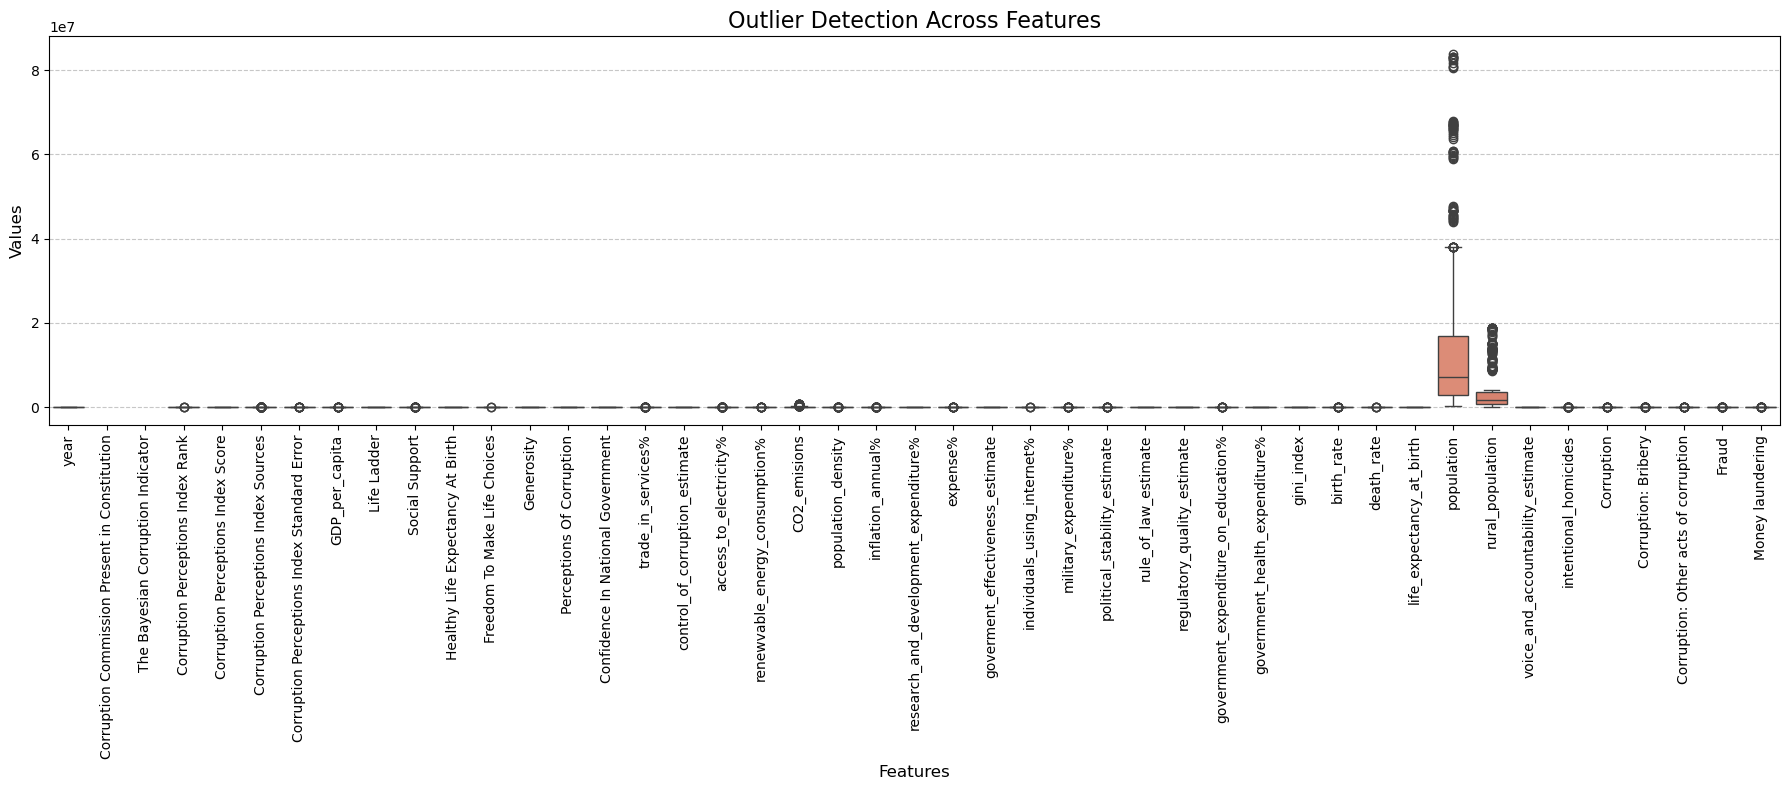

In [166]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=merged_data, palette="coolwarm", showfliers=True)
plt.title("Outlier Detection Across Features", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

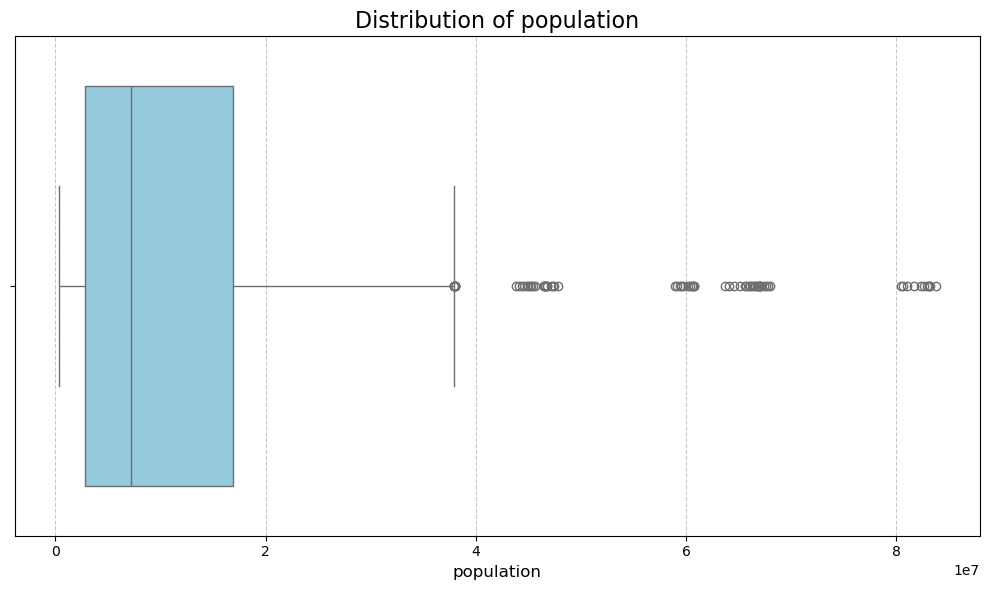

In [168]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_data['population'], color="skyblue", showfliers=True)
plt.title(f"Distribution of population", fontsize=16)
plt.xlabel('population', fontsize=12)
plt.tight_layout()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()